<a href="https://colab.research.google.com/github/wellalbuquerque/An-lise-de-Faturamento.py/blob/main/Desafio_MTEch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tech Detetives** - Analisando a Melhor Acomodação no RJ

**Pacote contém:**
- **Preço total:**
  - Valor aluguel
  - Despesas da acomodação (ex.: taxa de limpeza)
  - Preço de entrada dos Pontos Turísticos
  - Deslocamentos da acomodação até os Pontos Turísticos
- **Características da acomodação:**
  - Avaliação de outros hóspedes
  - Regras gerais da casa
  - Facilidades
  - Entre outros...
- **Localização:**
  - Bairro
  - Proximidade dos Pontos Turísticos
  - Segurança
  - Acesso
  - Favorabilidade ao turismo
- **Público alvo do pacote:**
  - Perfil escolhido
- **Dados do anunciante:**
  - Nome do host
  - Tempo que está anunciando na plataforma

**Destaque dos Requisitos Perfil 2:**<br>
- Orçamento até **R$4000,00**
- Estadia de **4 dias**
- Visitar Day Spa Good Living no **Copacabana Palace**
- Acomodação com **piscina**
- Aproveitar a **praia**
- Comer em **restaurantes conhecidos** do RJ

## Importação da Base de Dados

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [ ]:
df = pd.read_csv('https://github.com/wellalbuquerque/desafio-mtech-2021/blob/master/Dados/base_desafio_MTEch_2021.csv?raw=true')
df.head(2)

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,metros_quadrados,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
0,17878,https://www.airbnb.com/rooms/17878,Very Nice 2Br - Copacabana - WiFi,Pls note that special rates apply for Carnival...,- large balcony which looks out on pedestrian ...,Pls note that special rates apply for Carnival...,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It's like your ...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,https://a0.muscache.com/im/pictures/65320518/3...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,t,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,Copacabana,Rio de Janeiro,Rio de Janeiro,22020-050,t,Condominium,Entire home/apt,1.0,2.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$332.00,$378.00,2,4,30,243,2010-07-15,2019-11-11,93.0,10.0,10.0,10.0,10.0,2.13
1,25026,https://www.airbnb.com/rooms/25026,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,"internet wi-fi, cable tv, air cond, ceiling fa...","Only at check in, we like to leave our guests ...",Smoking outside only. Family building so pleas...,https://a0.muscache.com/im/pictures/3003965/68...,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,f,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,Copacabana,Rio de Janeiro,Rio de Janeiro,22060-020,t,Apartment,Entire home/apt,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$160.00,$250.00,2,7,60,235,2010-06-07,2019-10-08,94.0,10.0,9.0,10.0,10.0,2.04


In [ ]:
display(df[['id','nome','resumo', 'o_espaço','descrição','cidade','bairro','estado','CEP']].head(2))

,id,nome,resumo,o_espaço,descrição,cidade,bairro,estado,CEP
0,17878,Very Nice 2Br - Copacabana - WiFi,Pls note that special rates apply for Carnival...,- large balcony which looks out on pedestrian ...,Pls note that special rates apply for Carnival...,Rio de Janeiro,Copacabana,Rio de Janeiro,22020-050
1,25026,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",Rio de Janeiro,Copacabana,Rio de Janeiro,22060-020


## Análise Preliminar

In [ ]:
df.shape

(33715, 48)

In [ ]:
print(f'A base de dados original contém {df.shape[0]} linhas e {df.shape[1]} colunas.')

A base de dados original contém 33715 linhas e 48 colunas.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33715 entries, 0 to 33714
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33715 non-null  int64  
 1   link_da_acomodacão              33715 non-null  object 
 2   nome                            33654 non-null  object 
 3   resumo                          31661 non-null  object 
 4   o_espaço                        20756 non-null  object 
 5   descrição                       32785 non-null  object 
 6   visao_geral_bairro              18838 non-null  object 
 7   observações                     11247 non-null  object 
 8   transito                        18739 non-null  object 
 9   acesso                          16032 non-null  object 
 10  interacao                       16802 non-null  object 
 11  regras_da_casa                  17424 non-null  object 
 12  link_da_foto                    

**Obs**.: Colunas **preço** e **taxa_de_limpeza** que são **valores númericos** estão como **object** (str)! Tratar isto!

In [ ]:
df.isnull().sum()

id                                    0
link_da_acomodacão                    0
nome                                 61
resumo                             2054
o_espaço                          12959
descrição                           930
visao_geral_bairro                14877
observações                       22468
transito                          14976
acesso                            17683
interacao                         16913
regras_da_casa                    16291
link_da_foto                          0
host_id                               0
host_url                              0
nome_host                            20
inicio_host                          20
superhost                            20
numero_de_acomodacoes_host           20
verificações_do_host                  0
host_tem_foto_perfil                 20
host_tem_identidade_verificada       20
bairro                             1958
cidade                               82
estado                               47


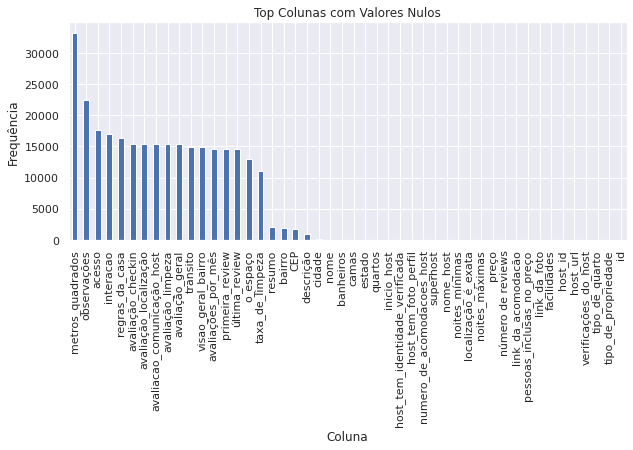

In [ ]:
plt.figure(figsize=(10, 4))
df.isnull().sum().sort_values(ascending=False).plot.bar()

plt.title('Top Colunas com Valores Nulos')
plt.xlabel('Coluna')
plt.ylabel('Frequência')
plt.show()

In [ ]:
valores_nulos_mq = df['metros_quadrados'].isnull().sum()
total_linhas_df = df.shape[0]

print(f'A coluna metros_quadrados tem cerca de {((valores_nulos_mq/total_linhas_df)*100):.2f}% de dados incompletos (nulos)!')
print(f'Esta coluna, portanto, não é relevante para nossa análise. Vamos retirá-la da base de dados.')

A coluna metros_quadrados tem cerca de 98.53% de dados incompletos (nulos)!
Esta coluna, portanto, não é relevante para nossa análise. Vamos retirá-la da base de dados.


In [ ]:
df.drop(axis=1, columns=['metros_quadrados'], inplace=True)

## Tratamento da Base de Dados Original

### Renomeando as colunas com valores 't' e 'f'

In [ ]:
df['superhost'].unique()

array(['t', 'f', nan], dtype=object)

In [ ]:
df['host_tem_foto_perfil'].unique()

array(['t', 'f', nan], dtype=object)

In [ ]:
df['host_tem_identidade_verificada'].unique()

array(['t', 'f', nan], dtype=object)

In [ ]:
df['localização_é_exata'].unique()

array(['t', 'f'], dtype=object)

In [ ]:
def mudar_label_t_f(nome_coluna):
  coluna = df[nome_coluna].map(map_t_f)
  return coluna

In [ ]:
map_t_f = {'t': 'sim', 'f': 'não'}

df['superhost'] = mudar_label_t_f('superhost')
df['host_tem_foto_perfil'] = mudar_label_t_f('host_tem_foto_perfil')
df['host_tem_identidade_verificada'] = mudar_label_t_f('host_tem_identidade_verificada')
df['localização_é_exata'] = mudar_label_t_f('localização_é_exata')

In [ ]:
df['superhost'].head()

0    sim
1    não
2    sim
3    sim
4    sim
Name: superhost, dtype: object

### Convertendo as **colunas preço** e **taxa_de_limpeza** para numérico

In [ ]:
df['preço']

0        $332.00
1        $160.00
2        $273.00
3        $378.00
4        $130.00
          ...   
33710    $500.00
33711    $202.00
33712    $151.00
33713    $252.00
33714    $269.00
Name: preço, Length: 33715, dtype: object

In [ ]:
df['taxa_de_limpeza']

0        $378.00
1        $250.00
2         $84.00
3        $172.00
4        $140.00
          ...   
33710    $150.00
33711    $200.00
33712     $50.00
33713        NaN
33714        NaN
Name: taxa_de_limpeza, Length: 33715, dtype: object

In [ ]:
df['preço'] = df['preço'].str.replace('$', '', regex=True)
df['preço'] = df['preço'].str.replace(',', '', regex=True)
df['preço'] = pd.to_numeric(df['preço'])

In [ ]:
df['taxa_de_limpeza'] = df['taxa_de_limpeza'].str.replace('$', '', regex=True)
df['taxa_de_limpeza'] = df['taxa_de_limpeza'].str.replace(',', '', regex=True)
df['taxa_de_limpeza'] = pd.to_numeric(df['taxa_de_limpeza'])

In [ ]:
df['preço']

0        332.0
1        160.0
2        273.0
3        378.0
4        130.0
         ...  
33710    500.0
33711    202.0
33712    151.0
33713    252.0
33714    269.0
Name: preço, Length: 33715, dtype: float64

In [ ]:
df['taxa_de_limpeza']

0        378.0
1        250.0
2         84.0
3        172.0
4        140.0
         ...  
33710    150.0
33711    200.0
33712     50.0
33713      NaN
33714      NaN
Name: taxa_de_limpeza, Length: 33715, dtype: float64

In [ ]:
df.sample(2)

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
7545,9318179,https://www.airbnb.com/rooms/9318179,BARRA DA TIJUCA-ABM-BEACH-COB,ABM-NEXT TO THE BRIDGE LUCIO COSTA (BARRA BEAC...,NaN,ABM-NEXT TO THE BRIDGE LUCIO COSTA (BARRA BEAC...,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/83713680-a...,43714852,https://www.airbnb.com/users/show/43714852,Raphael,2015-09-08,não,3.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",sim,não,Barra da Tijuca,Rio de Janeiro,Rio de Janeiro,22631-005,não,Condominium,Entire home/apt,2.0,2.0,3.0,"{TV,""Cable TV"",Internet,""Air conditioning"",Poo...",428.0,250.0,4,4,1125,2,2016-08-15,2016-08-19,90.0,10.0,10.0,10.0,10.0,0.05
17677,15174542,https://www.airbnb.com/rooms/15174542,Pousada Zefa - Suite Kingsize Family,Situada aos pés do Parque Nacional da Pedra Br...,NaN,Situada aos pés do Parque Nacional da Pedra Br...,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/8dc012d7-9...,91686086,https://www.airbnb.com/users/show/91686086,Daniel,2016-08-24,não,2.0,"['email', 'phone', 'reviews']",sim,não,NaN,Rio de Janeiro,Rio de Janeiro,22785-085,sim,Bed and breakfast,Private room,1.0,1.0,3.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",252.0,NaN,2,1,1125,1,2019-10-07,2019-10-07,100.0,10.0,10.0,10.0,10.0,0.64


## Verificando as distribuições de **preço** e **taxa_de_limpeza**

In [ ]:
df['preço'].describe()

count    33715.000000
mean       651.860537
std       1695.447098
min          0.000000
25%        151.000000
50%        290.000000
75%        600.000000
max      41982.000000
Name: preço, dtype: float64

In [ ]:
df['taxa_de_limpeza'].describe()

count    22731.000000
mean       158.406713
std        179.558794
min          0.000000
25%         90.000000
50%        150.000000
75%        200.000000
max      11755.000000
Name: taxa_de_limpeza, dtype: float64

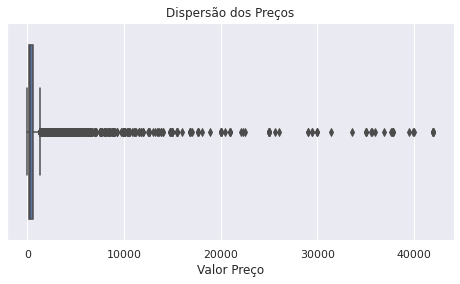

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=df['preço'])

plt.title('Dispersão dos Preços')
plt.xlabel('Valor Preço')
plt.show()

Vemos que existem diversos **outliers** na **coluna preço**. Nosso perfil não pode pagar **R\$40.000,00** pela diária (exemplo)! Devemos **remover os valores** que **não correspondem** ao orçamento do perfil, que é de **R\$4.000,00**.

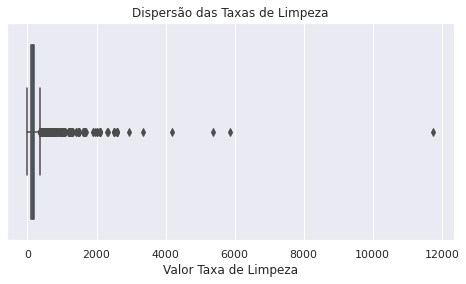

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=df['taxa_de_limpeza'])

plt.title('Dispersão das Taxas de Limpeza')
plt.xlabel('Valor Taxa de Limpeza')
plt.show()

O mesmo para a **taxa_de_limpeza**, porém devemos nos atentar ao preço **total da acomodação**: **preço da diária** \* **4** + **taxa de limpeza**

In [ ]:
# Verificando quais linhas possuem taxa de limpeza nula, não queremos surpresas no final haha
df_sem_taxa_limpeza = df[df['taxa_de_limpeza'].isnull()]
print(df_sem_taxa_limpeza.shape)
df_sem_taxa_limpeza.head(2)

(10984, 47)


,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
25,75585,https://www.airbnb.com/rooms/75585,Copacabana 2 BR Penthouse Duplex,Located between Copacabana and Ipanema beach....,Package deal for New Year and Carnival up to 1...,Located between Copacabana and Ipanema beach....,Most convenient and safe location between Copa...,NaN,All public transportation is very close by. Th...,All access,Available over Airbnb message system all the t...,There is a STRIKT NO SMOKING policy in the apa...,https://a0.muscache.com/im/pictures/597881/1c7...,401375,https://www.airbnb.com/users/show/401375,Stefan,2011-02-20,sim,1.0,"['email', 'phone', 'facebook', 'reviews']",sim,não,Copacabana,Rio de Janeiro,Rio de Janeiro,22071-100,sim,Condominium,Entire home/apt,1.0,2.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",306.0,NaN,4,5,180,95,2011-03-14,2019-11-10,96.0,10.0,10.0,10.0,10.0,0.90
27,76300,https://www.airbnb.com/rooms/76300,"GREAT VIEW -Guesthouse ""CASA 48""- Santa Teresa...",If you want to experience something different ...,----------------------------------------------...,If you want to experience something different ...,** LE QUARTIER DE SANTA TERESA ** Santa Teres...,** PETIT DEJEUNER ** Le petit-déjeuner est se...,** ACCÈS FACILE EN TAXI / UBER / BUS ** La r...,** L'ESPACE ** Vous profiterez de 2 grands sa...,"** L'AUTRE ""+"" de Casa 48 ** La Casa 48 est u...",- Main rule at Casa 48 : NO DRUGS! - Please p...,https://a0.muscache.com/im/pictures/46305372/4...,406989,https://www.airbnb.com/users/show/406989,Casa 48 Guesthouse,2011-02-23,sim,7.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",sim,sim,Santa Teresa,Rio de Janeiro,Rio de Janeiro,20241-263,sim,Bed and breakfast,Private room,5.0,7.0,10.0,"{Internet,Wifi,""Wheelchair accessible"",Pool,Ki...",185.0,NaN,2,1,30,201,2012-02-22,2019-11-01,95.0,9.0,10.0,10.0,10.0,2.13


10.984 linhas representam **acomodações** das quais a **taxa_de_limpeza** é **desconhecida**. Para efeitos de segurança e **não ter surpresas na viagem**, vamos **retirá-las** para termos **certeza** do que estamos **pagando**!

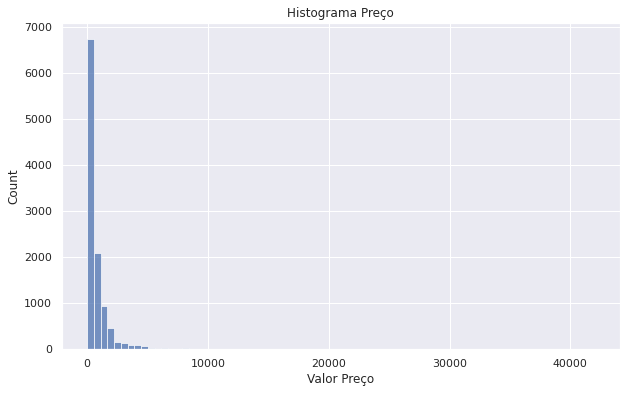

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x=df_sem_taxa_limpeza['preço'], bins=75)

plt.title('Histograma Preço')
plt.xlabel('Valor Preço')
plt.show()

**Retirando** as acomodações com valores de **taxa_de_acomodação nulo**:

In [ ]:
## Data Frame sem valores nulos de taxa de limpeza
df = df[~df['taxa_de_limpeza'].isnull()]
print(df.shape)
df.head(2)

(22731, 47)


,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
0,17878,https://www.airbnb.com/rooms/17878,Very Nice 2Br - Copacabana - WiFi,Pls note that special rates apply for Carnival...,- large balcony which looks out on pedestrian ...,Pls note that special rates apply for Carnival...,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It's like your ...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,https://a0.muscache.com/im/pictures/65320518/3...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,sim,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",sim,sim,Copacabana,Rio de Janeiro,Rio de Janeiro,22020-050,sim,Condominium,Entire home/apt,1.0,2.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",332.0,378.0,2,4,30,243,2010-07-15,2019-11-11,93.0,10.0,10.0,10.0,10.0,2.13
1,25026,https://www.airbnb.com/rooms/25026,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,"internet wi-fi, cable tv, air cond, ceiling fa...","Only at check in, we like to leave our guests ...",Smoking outside only. Family building so pleas...,https://a0.muscache.com/im/pictures/3003965/68...,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,não,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",sim,sim,Copacabana,Rio de Janeiro,Rio de Janeiro,22060-020,sim,Apartment,Entire home/apt,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",160.0,250.0,2,7,60,235,2010-06-07,2019-10-08,94.0,10.0,9.0,10.0,10.0,2.04


In [ ]:
df.shape[0] + df_sem_taxa_limpeza.shape[0]

33715

**Conferindo** se o **conjunto atual** mais o **conjunto com valores nulos** corresponde ao **total original**.

In [ ]:
df['taxa_de_limpeza'].isnull().sum()

0

## Filtrando a melhor acomodação: **pelo orçamento**

O nosso **orçamento máximo** para a viagem é de **R$4.000,00**. Vamos primeiro calcular o **valor total da acomodação** de cada registro para depois remover os **principais outliers**.

In [ ]:
orcamento_max = 4000
acomodacao_e_taxas = ((df['preço'] * 4) + df['taxa_de_limpeza'])

In [ ]:
df = df[acomodacao_e_taxas <= orcamento_max]
print(len(df))
df.head(2)

20116


,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês
0,17878,https://www.airbnb.com/rooms/17878,Very Nice 2Br - Copacabana - WiFi,Pls note that special rates apply for Carnival...,- large balcony which looks out on pedestrian ...,Pls note that special rates apply for Carnival...,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It's like your ...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,https://a0.muscache.com/im/pictures/65320518/3...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,sim,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",sim,sim,Copacabana,Rio de Janeiro,Rio de Janeiro,22020-050,sim,Condominium,Entire home/apt,1.0,2.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",332.0,378.0,2,4,30,243,2010-07-15,2019-11-11,93.0,10.0,10.0,10.0,10.0,2.13
1,25026,https://www.airbnb.com/rooms/25026,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,"internet wi-fi, cable tv, air cond, ceiling fa...","Only at check in, we like to leave our guests ...",Smoking outside only. Family building so pleas...,https://a0.muscache.com/im/pictures/3003965/68...,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,não,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",sim,sim,Copacabana,Rio de Janeiro,Rio de Janeiro,22060-020,sim,Apartment,Entire home/apt,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",160.0,250.0,2,7,60,235,2010-06-07,2019-10-08,94.0,10.0,9.0,10.0,10.0,2.04


In [ ]:
df['acomodação_e_taxas'] = acomodacao_e_taxas
df['orçamento_restante'] = orcamento_max - acomodacao_e_taxas
df.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês,acomodação_e_taxas,orçamento_restante
0,17878,https://www.airbnb.com/rooms/17878,Very Nice 2Br - Copacabana - WiFi,Pls note that special rates apply for Carnival...,- large balcony which looks out on pedestrian ...,Pls note that special rates apply for Carnival...,This is the best spot in Rio. Everything happe...,NaN,Excellent location. Close to all major public ...,The entire apartment is yours. It's like your ...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,https://a0.muscache.com/im/pictures/65320518/3...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,sim,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",sim,sim,Copacabana,Rio de Janeiro,Rio de Janeiro,22020-050,sim,Condominium,Entire home/apt,1.0,2.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",332.0,378.0,2,4,30,243,2010-07-15,2019-11-11,93.0,10.0,10.0,10.0,10.0,2.13,1706.0,2294.0
1,25026,https://www.airbnb.com/rooms/25026,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,"For any stay superior to 15 days, an additiona...",At night we recommend you to take taxis only. ...,"internet wi-fi, cable tv, air cond, ceiling fa...","Only at check in, we like to leave our guests ...",Smoking outside only. Family building so pleas...,https://a0.muscache.com/im/pictures/3003965/68...,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,não,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",sim,sim,Copacabana,Rio de Janeiro,Rio de Janeiro,22060-020,sim,Apartment,Entire home/apt,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",160.0,250.0,2,7,60,235,2010-06-07,2019-10-08,94.0,10.0,9.0,10.0,10.0,2.04,890.0,3110.0


Com o **rçamento máximo** e o **valor total de cada acomodação**, podemos calcular quanto nos **resta**, é onde criamos a coluna **orçamento_restante**.

In [ ]:
df.shape

(20116, 49)

Removemos os **principais outliers de preço**, assim sobraram **20.116 acomodações** que em teoria entram no **orçamento**.<br>
Vamos **analisar** depois, se existem alguma **correlação** entre as **colunas**.

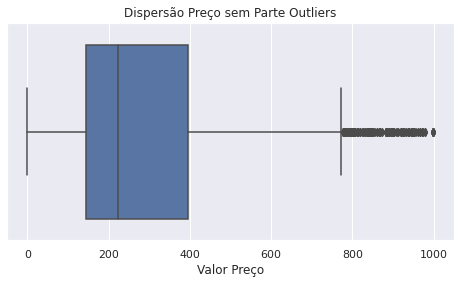

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=df['preço'])

plt.title('Dispersão Preço sem Parte Outliers')
plt.xlabel('Valor Preço')
plt.show()

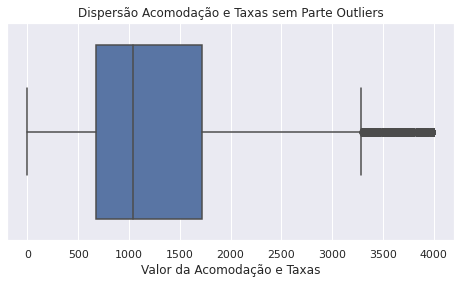

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=df['acomodação_e_taxas'])

plt.title('Dispersão Acomodação e Taxas sem Parte Outliers')
plt.xlabel('Valor da Acomodação e Taxas')
plt.show()

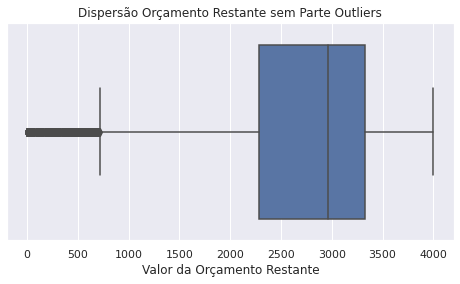

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=df['orçamento_restante'])

plt.title('Dispersão Orçamento Restante sem Parte Outliers')
plt.xlabel('Valor da Orçamento Restante')
plt.show()

## Correlação

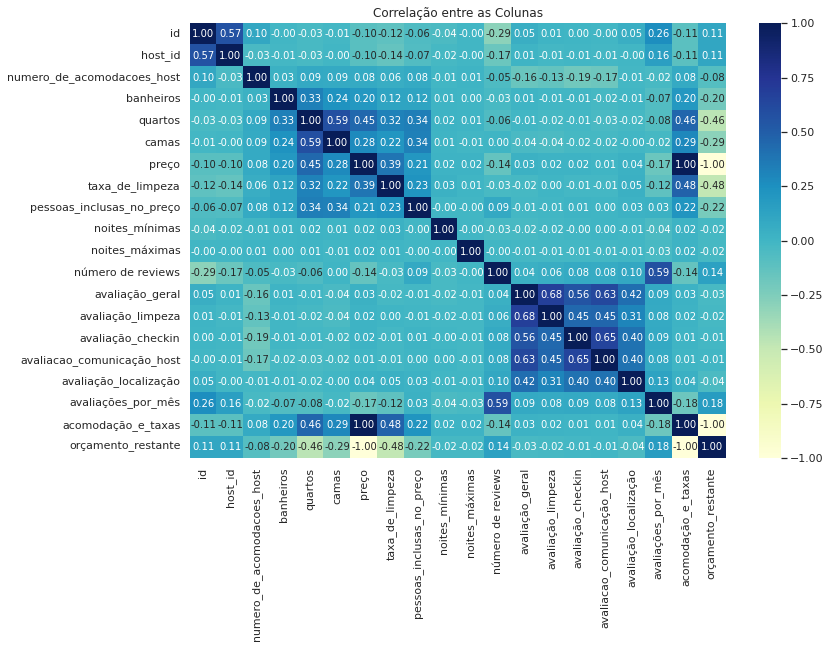

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', cmap='YlGnBu')

plt.title('Correlação entre as Colunas')
plt.show()

In [ ]:
data_corr = df.loc[:, [
                       'acomodação_e_taxas', 'preço', 'orçamento_restante', 'taxa_de_limpeza', 'avaliações_por_mês',
                       'avaliação_geral', 'avaliação_limpeza', 'avaliação_checkin', 'avaliacao_comunicação_host', 'superhost'
                       ]]

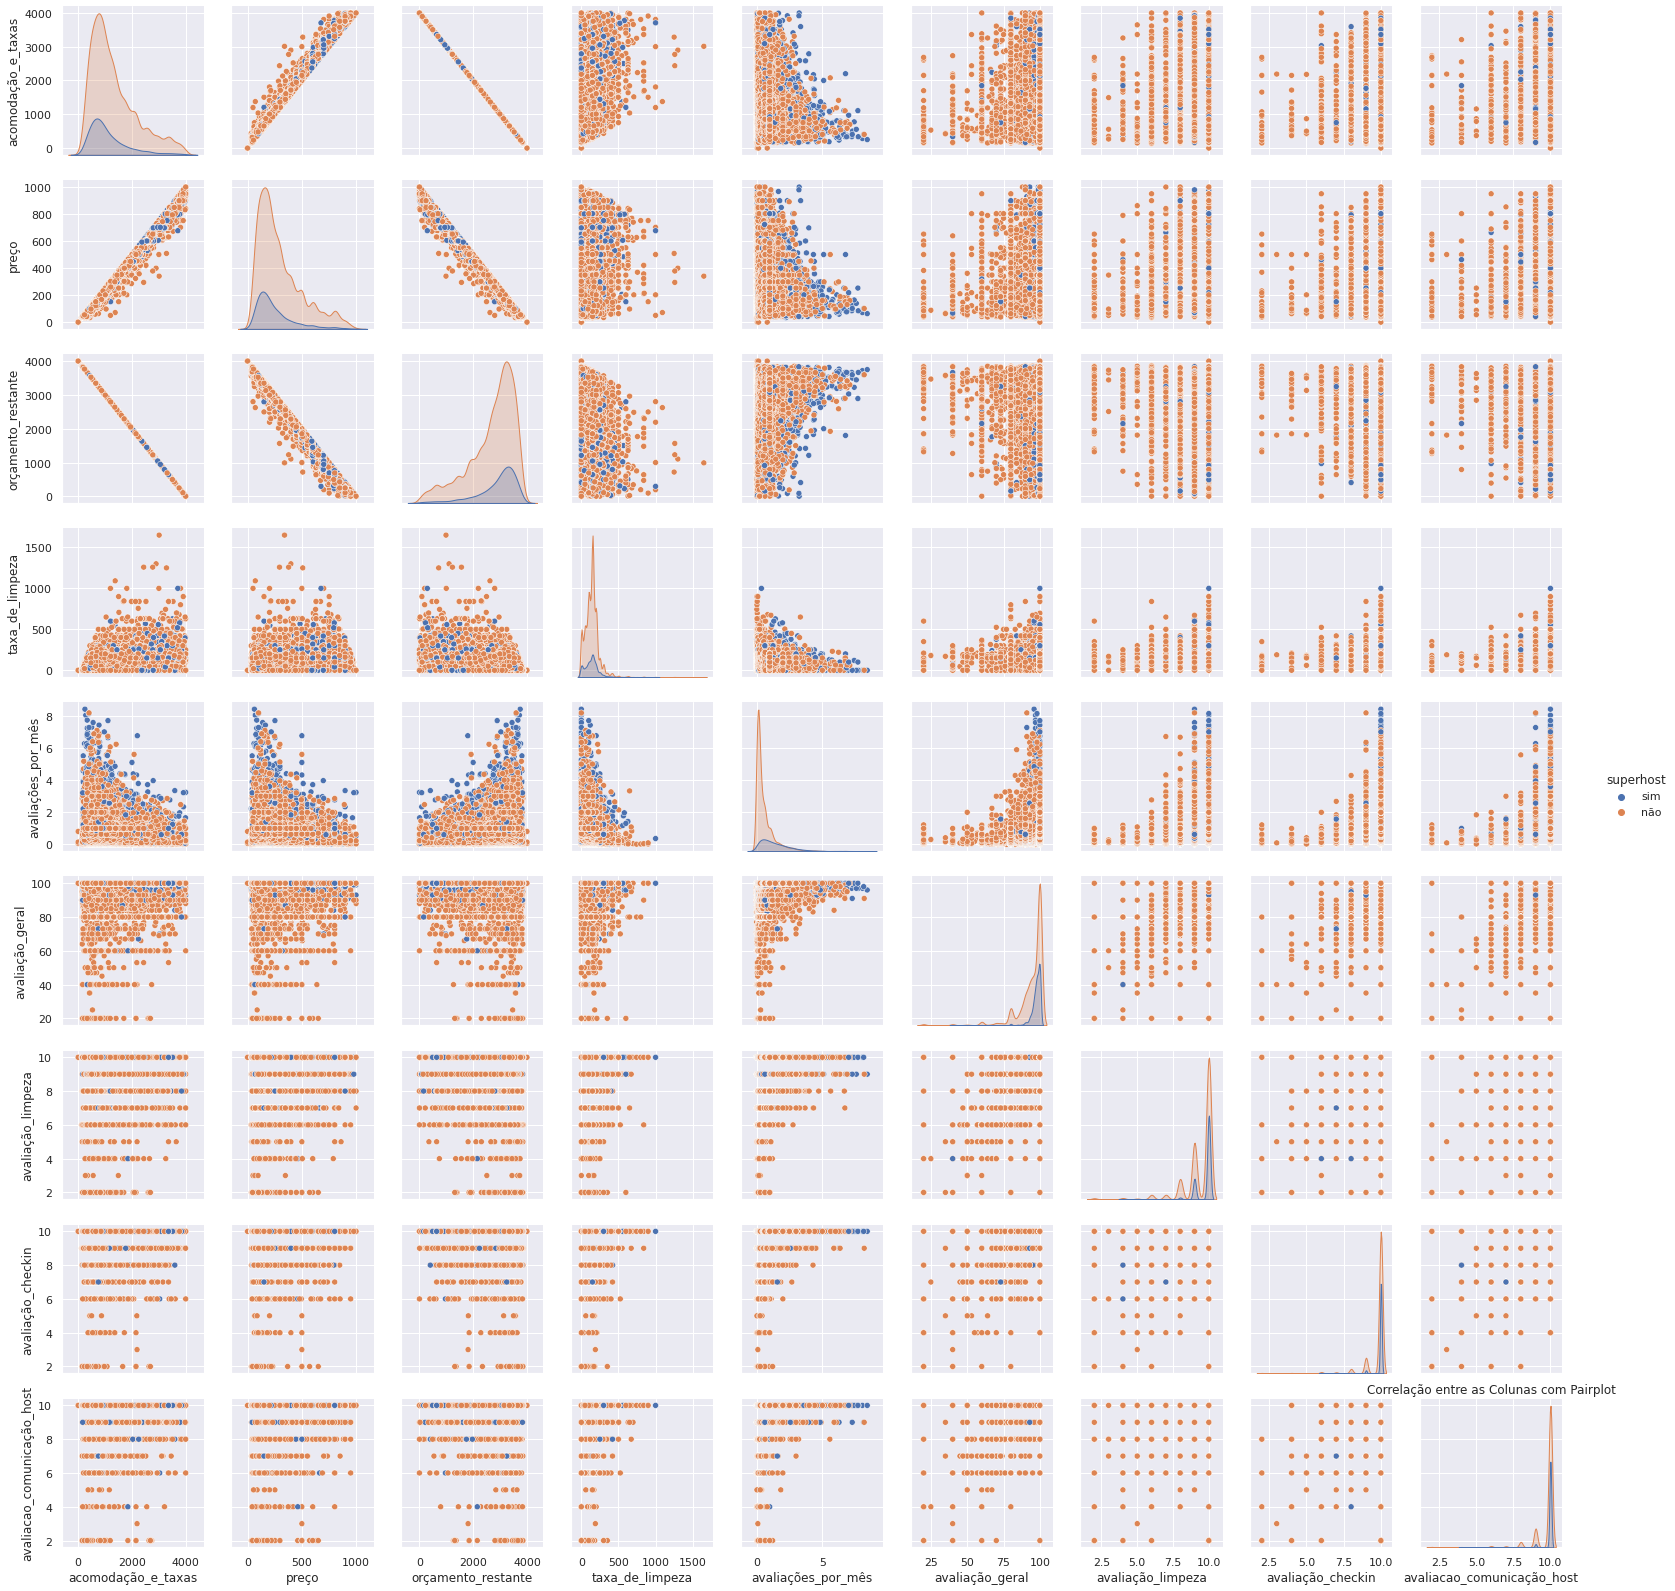

In [ ]:
sns.pairplot(data=data_corr, hue='superhost')

plt.title('Correlação entre as Colunas com Pairplot')
plt.show()

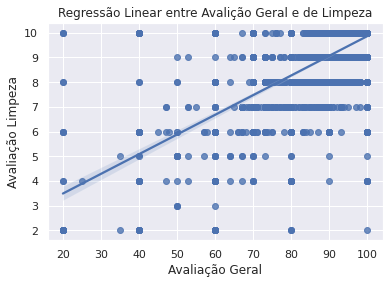

In [ ]:
sns.regplot(x='avaliação_geral', y='avaliação_limpeza', data=df)

plt.title('Regressão Linear entre Avalição Geral e de Limpeza')
plt.xlabel('Avaliação Geral')
plt.ylabel('Avaliação Limpeza')
plt.show()

## Filtrando a melhor acomodação: **pelos requisitos**

#### Verificando os **melhores locais** e **tipos da acomodação**

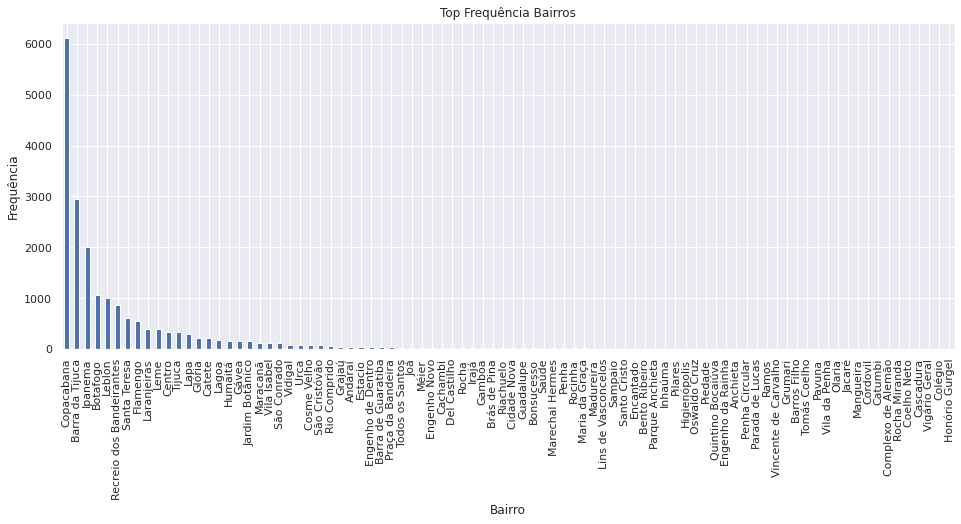

In [ ]:
plt.figure(figsize=(16, 6))
df['bairro'].value_counts().sort_values(ascending=False).plot.bar()

plt.title('Top Frequência Bairros')
plt.xlabel('Bairro')
plt.ylabel('Frequência')
plt.show()

In [ ]:
df['bairro'].unique()

array(['Copacabana', 'Ipanema', 'Flamengo', 'Leblon', nan, 'Lapa',
       'Gávea', 'Santa Teresa', 'Barra da Tijuca', 'Jardim Botânico',
       'Botafogo', 'Glória', 'Laranjeiras', 'Tijuca', 'Rocha', 'Catete',
       'Humaitá', 'Recreio dos Bandeirantes', 'Vidigal', 'Centro',
       'Marechal Hermes', 'Lagoa', 'São Conrado', 'Leme', 'São Cristóvão',
       'Estacio', 'Grajaú', 'Cosme Velho', 'Urca', 'Vila Isabel', 'Joá',
       'Penha Circular', 'Encantado', 'Rio Comprido',
       'Lins de Vasconcelos', 'Praça da Bandeira', 'Gamboa',
       'Bento Ribeiro', 'Riachuelo', 'Barra de Guaratiba', 'Maracanã',
       'Andaraí', 'Cidade Nova', 'Del Castilho', 'Rocinha',
       'Engenho Novo', 'Maria da Graça', 'Irajá', 'Cachambi',
       'Engenho de Dentro', 'Higienópolis', 'Todos os Santos',
       'Engenho da Rainha', 'Rocha Miranda', 'Olaria', 'Méier', 'Pilares',
       'Saúde', 'Brás de Pina', 'Penha', 'Quintino Bocaiúva', 'Sampaio',
       'Vila da Penha', 'Colégio', 'Santo Cristo', 'Bons

In [ ]:
df['cidade'].value_counts()

Rio de Janeiro                 10252
Copacabana                      2704
Rio                             1017
Barra da Tijuca                  856
Ipanema                          628
                               ...  
Copacabana Rio de Janeiro          1
Rio de Janeiro, Ipanema            1
IPANEMA                            1
Riocentro                          1
Copacabana - Rio de Janeiro        1
Name: cidade, Length: 217, dtype: int64

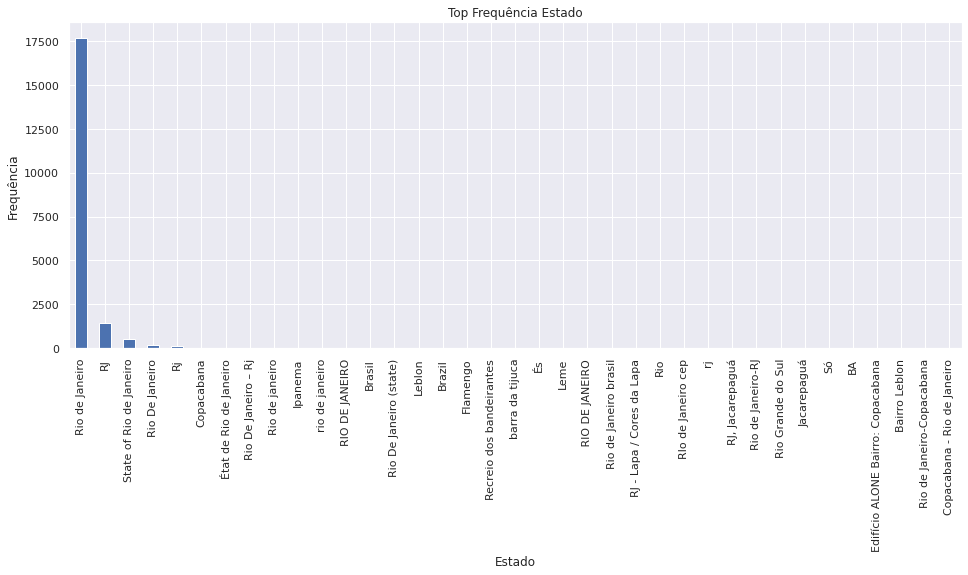

In [ ]:
plt.figure(figsize=(16, 6))
df['estado'].value_counts().plot.bar()

plt.title('Top Frequência Estado')
plt.xlabel('Estado')
plt.ylabel('Frequência')
plt.show()

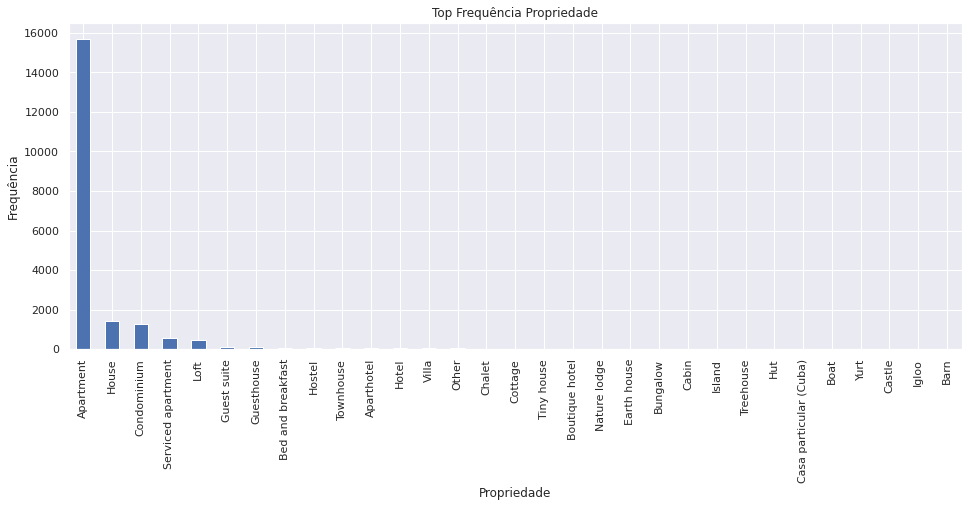

In [ ]:
plt.figure(figsize=(16, 6))
df['tipo_de_propriedade'].value_counts().plot.bar()

plt.title('Top Frequência Propriedade')
plt.xlabel('Propriedade')
plt.ylabel('Frequência')
plt.show()

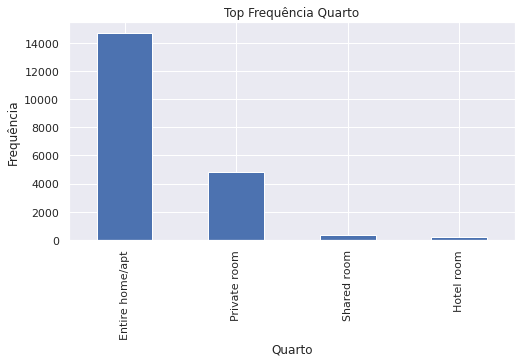

In [ ]:
plt.figure(figsize=(8, 4))
df['tipo_de_quarto'].value_counts().plot.bar()

plt.title('Top Frequência Quarto')
plt.xlabel('Quarto')
plt.ylabel('Frequência')
plt.show()

In [ ]:
filtro_quartos = ((df['tipo_de_quarto'] == 'Shared room'))

df_filtro = df.loc[~filtro_quartos]
print(df_filtro.shape)

(19779, 49)


**Obs.:** Não queremos as acomodações com **Shared room**

In [ ]:
filtro_propriedade = (
    (df['tipo_de_propriedade'] == 'Guesthouse') | 
    (df['tipo_de_propriedade'] == 'Guest suite') |
    (df['tipo_de_propriedade'] == 'Treehouse') |
    (df['tipo_de_propriedade'] == 'Yurt') |
    (df['tipo_de_propriedade'] == 'Barn') |
    (df['tipo_de_propriedade'] == 'Igloo') |
    (df['tipo_de_propriedade'] == 'Other') |
    (df['tipo_de_propriedade'] == 'Bed and breakfast')
  ) 

df_filtro = df_filtro.loc[~filtro_propriedade]
print(df_filtro.shape)

(19481, 49)


**Obs.:** Não queremos as acomodações que sejam **Guesthouse**, **Guest suite** etc.

In [ ]:
filtro_bairro = (
    (df['bairro'] == 'Copacabana') | 
    (df['tipo_de_propriedade'] == 'Ipanema') |
    (df['tipo_de_propriedade'] == 'Flamengo') |
    (df['tipo_de_propriedade'] == 'Leblon') |
    (df['tipo_de_propriedade'] == 'Jardim Botânico') |
    (df['tipo_de_propriedade'] == 'Botafogo') |
    (df['tipo_de_propriedade'] == 'Glória') |
    (df['tipo_de_propriedade'] == 'Laranjeiras') |
    (df['tipo_de_propriedade'] == 'Gávea') |
    (df['tipo_de_propriedade'] == 'Lagoa') |
    (df['tipo_de_propriedade'] == 'Humaitá') |
    (df['tipo_de_propriedade'] == 'Leme') |
    (df['tipo_de_propriedade'] == 'Urca') |
    (df['tipo_de_propriedade'] == 'Catete') |
    (df['tipo_de_propriedade'] == 'Centro') |
    (df['tipo_de_propriedade'] == 'Urca')
  ) 

df_filtro = df_filtro.loc[filtro_bairro]
print(df_filtro.shape)

(5988, 49)


**Obs.:** **Queremos** as acomodações que sejam **próximas** à **praia** e **perto** do ponto turístico do **Copacabana Palace**.

Nos restaram, portanto, **5.988 acomodações** que tenham um **preço dentro do orçamento** e com **localidades** favoráveis ao **perfil do casal**.

#### Filtrando as acomodações por **palavras-chave** do **perfil**

In [ ]:
def search_key_words(key_words):
  search_index = []

  for index in range(0, len(df_filtro)):
    for element in df_filtro.iloc[index].values:
      if type(element) == str:
        if any(x in element.lower() for x in matches):
          search_index.append(index)

  search_index = set(search_index)
  search_index = sorted(search_index)

  new_df = df_filtro.iloc[search_index, :]
  new_df.reset_index(drop=True, inplace=True)
  return new_df

In [ ]:
matches = ['double bed', 'private room']

df_filtro = search_key_words(matches)
print(len(df_filtro))

1718


Nos restaram, portanto, **1.718 acomodações** que atendam aos **requisitos** anteriormente mencionados mais **acomodações** que tenham relação com a **cama de casal** (double bed, private room).

In [ ]:
matches = ['privado', 'private']

df_filtro = search_key_words(matches)
print(len(df_filtro))

1178


Nos restaram, portanto, **1.178 acomodações** que atendam aos **requisitos** anteriormente mencionados mais **acomodações** que tenham relação com a **privacidade** (privado, private).

In [ ]:
matches = ['piscina', 'pool', 'swimming']

df_filtro = search_key_words(matches)
print(len(df_filtro))

69


Nos restaram, portanto, **69 acomodações** que atendam aos **requisitos** anteriormente mencionados mais **acomodações** que tenham relação com **piscina** (piscina, pool, swimming)

In [ ]:
df_filtro.sample(2)

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês,acomodação_e_taxas,orçamento_restante
38,22793889,https://www.airbnb.com/rooms/22793889,"Santa Clara Flat em Copacabana, RJ",Apartamento com decoração estilo Art Déco com ...,Ideal para casal e mais um hospede.,Apartamento com decoração estilo Art Déco com ...,NaN,NaN,NaN,Internet Wi-fi,NaN,- Horario de Silencio 22:00h,https://a0.muscache.com/im/pictures/f8b3bee7-1...,45815552,https://www.airbnb.com/users/show/45815552,Heloisa,2015-10-05,sim,3.0,"['phone', 'reviews']",sim,não,Copacabana,Copacabana,Rio de Janeiro,22041-010,sim,Condominium,Private room,2.0,1.0,2.0,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",298.0,150.0,3,3,1125,7,2018-01-26,2019-04-22,88.0,10.0,8.0,8.0,10.0,0.32,1342.0,2658.0
48,27521953,https://www.airbnb.com/rooms/27521953,Cute Apart Hotel in Copacabana,NaN,NaN,THE APARTMENT If you are looking for a place t...,NaN,THE APARTMENT If you are looking for a place t...,NaN,NaN,NaN,A HOSPEDAGEM Nosso anfitriões gostam de recebe...,https://a0.muscache.com/im/pictures/6440a7da-5...,10607843,https://www.airbnb.com/users/show/10607843,Paula & Ronaldo,2013-12-13,sim,7.0,"['email', 'phone', 'reviews', 'manual_offline'...",sim,não,Copacabana,Copacabana,Rio de Janeiro,22050-012,sim,Apartment,Entire home/apt,1.0,1.0,1.0,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,Gym,E...",189.0,160.0,2,1,60,26,2018-08-14,2019-10-31,92.0,10.0,10.0,10.0,10.0,1.67,916.0,3084.0


In [ ]:
df_filtro.isnull().sum()

id                                 0
link_da_acomodacão                 0
nome                               0
resumo                            10
o_espaço                          18
descrição                          1
visao_geral_bairro                25
observações                       30
transito                          24
acesso                            21
interacao                         22
regras_da_casa                    16
link_da_foto                       0
host_id                            0
host_url                           0
nome_host                          0
inicio_host                        0
superhost                          0
numero_de_acomodacoes_host         0
verificações_do_host               0
host_tem_foto_perfil               0
host_tem_identidade_verificada     0
bairro                             0
cidade                             0
estado                             1
CEP                                3
localização_é_exata                0
t

Vamos remover as **acomodações** que **não** possuem informações **importantes** (valores nulos), como **avaliações, regras**, etc.

In [ ]:
df_filtro.dropna(axis=0, subset=['avaliação_limpeza', 'visao_geral_bairro', 'regras_da_casa', 'observações'], inplace=True)
print(df_filtro.shape)
df_filtro.isnull().sum()

(22, 49)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


id                                0
link_da_acomodacão                0
nome                              0
resumo                            0
o_espaço                          1
descrição                         0
visao_geral_bairro                0
observações                       0
transito                          0
acesso                            0
interacao                         1
regras_da_casa                    0
link_da_foto                      0
host_id                           0
host_url                          0
nome_host                         0
inicio_host                       0
superhost                         0
numero_de_acomodacoes_host        0
verificações_do_host              0
host_tem_foto_perfil              0
host_tem_identidade_verificada    0
bairro                            0
cidade                            0
estado                            0
CEP                               0
localização_é_exata               0
tipo_de_propriedade         

## Filtrando a melhor acomodação: **por características**

In [ ]:
df_filtro.head(2)

,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês,acomodação_e_taxas,orçamento_restante
0,878810,https://www.airbnb.com/rooms/878810,Your house in Rio,"Spacious, well-equipped, comfortable, wi-fi, l...","It is a nice two bedroom apartment, one big an...","Spacious, well-equipped, comfortable, wi-fi, l...",The apartment is in a quiet street in Copacaba...,"O prédio é seguro, com porteiro 24 horas, 7 di...","Easy to take taxi, bus or subway Near everythi...","Guest have access to the intere apartment, swi...",Hi! I will meet you for check in and you will ...,"It is a family building, so no loud noise or m...",https://a0.muscache.com/im/pictures/f8177847-5...,2486187,https://www.airbnb.com/users/show/2486187,Juliana,2012-05-28,não,1.0,"['email', 'phone', 'facebook', 'reviews']",sim,não,Copacabana,Rio de Janeiro,Rio de Janeiro,22051-030,não,Apartment,Entire home/apt,1.5,2.0,2.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",""Wheelc...",348.0,150.0,1,6,60,19,2013-02-15,2019-04-18,99.0,10.0,10.0,10.0,10.0,0.23,1542.0,2458.0
3,2263327,https://www.airbnb.com/rooms/2263327,Private Room in Copacabana -> The Best Price! :),The accomodation is totally private - 25 m2 - ...,"In few words: ""It's a great structure of Hotel...",The accomodation is totally private - 25 m2 - ...,"The greatest thing is the privacy, the silence...",Eu sempre abasteço o quarto com água e biscoit...,The Avenue where we are located is fantastic f...,Every place in the building is available for t...,I'm always at disposal for any question and so...,"4 Small rules :) 1) Please, don't make too muc...",https://a0.muscache.com/im/pictures/1cc2656e-5...,10533027,https://www.airbnb.com/users/show/10533027,Igor,2013-12-09,sim,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",sim,sim,Copacabana,Rio,Rio de Janeiro,22011-010,sim,Serviced apartment,Hotel room,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",101.0,85.0,2,3,60,110,2014-07-28,2019-09-07,96.0,10.0,10.0,10.0,10.0,1.70,489.0,3511.0


In [ ]:
df_filtro.shape

(22, 49)

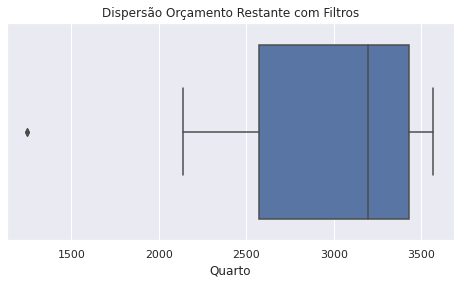

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=df_filtro['orçamento_restante'])

plt.title('Dispersão Orçamento Restante com Filtros')
plt.xlabel('Quarto')
plt.show()

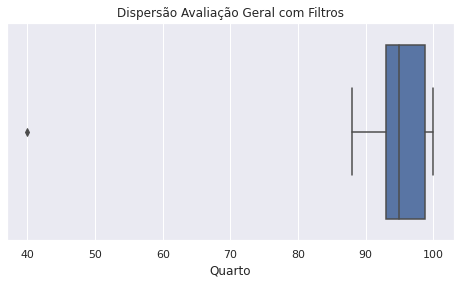

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=df_filtro['avaliação_geral'])

plt.title('Dispersão Avaliação Geral com Filtros')
plt.xlabel('Quarto')
plt.show()

In [ ]:
df_top_acomodacoes = df_filtro.query(
    "avaliação_geral > 92 & orçamento_restante > 3000 & pessoas_inclusas_no_preço >= 2 & host_tem_identidade_verificada == 'sim' & superhost == 'sim'"
    )
df_top_acomodacoes.reset_index(drop=True, inplace=True)
print(df_top_acomodacoes.shape)
df_top_acomodacoes.head(2)

(2, 49)


,id,link_da_acomodacão,nome,resumo,o_espaço,descrição,visao_geral_bairro,observações,transito,acesso,interacao,regras_da_casa,link_da_foto,host_id,host_url,nome_host,inicio_host,superhost,numero_de_acomodacoes_host,verificações_do_host,host_tem_foto_perfil,host_tem_identidade_verificada,bairro,cidade,estado,CEP,localização_é_exata,tipo_de_propriedade,tipo_de_quarto,banheiros,quartos,camas,facilidades,preço,taxa_de_limpeza,pessoas_inclusas_no_preço,noites_mínimas,noites_máximas,número de reviews,primeira_review,última_review,avaliação_geral,avaliação_limpeza,avaliação_checkin,avaliacao_comunicação_host,avaliação_localização,avaliações_por_mês,acomodação_e_taxas,orçamento_restante
0,2263327,https://www.airbnb.com/rooms/2263327,Private Room in Copacabana -> The Best Price! :),The accomodation is totally private - 25 m2 - ...,"In few words: ""It's a great structure of Hotel...",The accomodation is totally private - 25 m2 - ...,"The greatest thing is the privacy, the silence...",Eu sempre abasteço o quarto com água e biscoit...,The Avenue where we are located is fantastic f...,Every place in the building is available for t...,I'm always at disposal for any question and so...,"4 Small rules :) 1) Please, don't make too muc...",https://a0.muscache.com/im/pictures/1cc2656e-5...,10533027,https://www.airbnb.com/users/show/10533027,Igor,2013-12-09,sim,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",sim,sim,Copacabana,Rio,Rio de Janeiro,22011-010,sim,Serviced apartment,Hotel room,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",101.0,85.0,2,3,60,110,2014-07-28,2019-09-07,96.0,10.0,10.0,10.0,10.0,1.70,489.0,3511.0
1,11003107,https://www.airbnb.com/rooms/11003107,Casa de Família Quarto 4 pessoas Piscina Metrô,* Apartamento compartilhado com Márcia e Fábio...,"* Já recebemos muitos grupos no Rio, com ótima...",* Apartamento compartilhado com Márcia e Fábio...,"* Copacabana está na Zona Sul do Rio, um dos b...",Regras da Casa ----- 1) Desligar as luzes e o...,* Recepção aberta durante 24 horas * Acesso fa...,* Bar Bunda de Fora. Boa comida a kilo ao lado...,* Não hesite em nos contatar para mais informa...,Regras da Casa / Reglas de La Casa / House Rul...,https://a0.muscache.com/im/pictures/6ba33bd0-e...,57095916,https://www.airbnb.com/users/show/57095916,Márcia,2016-02-02,sim,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",sim,sim,Copacabana,Rio de Janeiro,Rio de Janeiro,22040-002,sim,Apartment,Private room,1.0,1.0,3.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",88.0,79.0,3,2,32,93,2016-02-21,2019-08-25,99.0,10.0,10.0,10.0,10.0,2.04,431.0,3569.0


Restaram justamente **2 pacotes** com todos os **filtros aplicados** para a escolha da melhor acomodação. <br>
Agora, vamos analisar **detalhadamente** cada um para ver a melhor para o **perfil do casal**.

#### Vendo os pacotes **restantes**

In [ ]:
potencial_pacote_1 = df_top_acomodacoes.iloc[0]
potencial_pacote_1

id                                                                          2263327
link_da_acomodacão                             https://www.airbnb.com/rooms/2263327
nome                              Private Room in Copacabana  -> The Best Price! :)
resumo                            The accomodation is totally private - 25 m2 - ...
o_espaço                          In few words: "It's a great structure of Hotel...
descrição                         The accomodation is totally private - 25 m2 - ...
visao_geral_bairro                The greatest thing is the privacy, the silence...
observações                       Eu sempre abasteço o quarto com água e biscoit...
transito                          The Avenue where we are located is fantastic f...
acesso                            Every place in the building is available for t...
interacao                         I'm always at disposal for any question and so...
regras_da_casa                    4 Small rules :) 1) Please, don't make too

In [ ]:
potencial_pacote_2 = df_top_acomodacoes.iloc[1]
potencial_pacote_2

id                                                                         11003107
link_da_acomodacão                            https://www.airbnb.com/rooms/11003107
nome                                 Casa de Família Quarto 4 pessoas Piscina Metrô
resumo                            * Apartamento compartilhado com Márcia e Fábio...
o_espaço                          * Já recebemos muitos grupos no Rio, com ótima...
descrição                         * Apartamento compartilhado com Márcia e Fábio...
visao_geral_bairro                * Copacabana está na Zona Sul do Rio, um dos b...
observações                       Regras da Casa  ----- 1) Desligar as luzes e o...
transito                          * Recepção aberta durante 24 horas * Acesso fa...
acesso                            * Bar Bunda de Fora. Boa comida a kilo ao lado...
interacao                         * Não hesite em nos contatar para mais informa...
regras_da_casa                    Regras da Casa / Reglas de La Casa / House

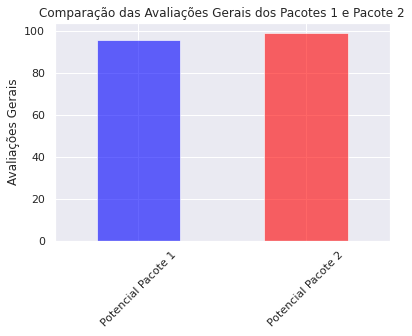

In [ ]:
ax = df_top_acomodacoes['avaliação_geral'].plot.bar(color=['Blue', 'Red'], alpha=0.6)

ax.set_xticklabels(['Potencial Pacote 1', 'Potencial Pacote 2'])
plt.title('Comparação das Avaliações Gerais dos Pacotes 1 e Pacote 2')
plt.ylabel('Avaliações Gerais')
plt.xticks(rotation=45)
plt.show()

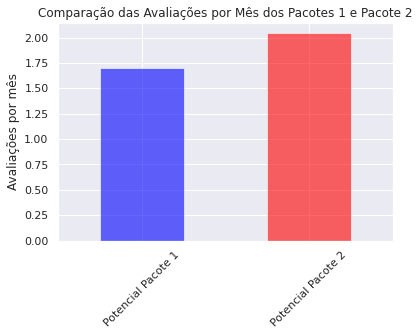

In [ ]:
ax = df_top_acomodacoes['avaliações_por_mês'].plot.bar(color=['Blue', 'Red'], alpha=0.6)

ax.set_xticklabels(['Potencial Pacote 1', 'Potencial Pacote 2'])
plt.title('Comparação das Avaliações por Mês dos Pacotes 1 e Pacote 2')
plt.ylabel('Avaliações por mês')
plt.xticks(rotation=45)
plt.show()

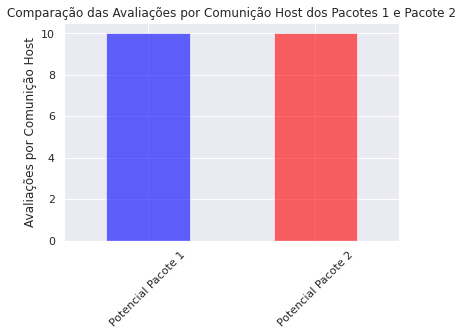

In [ ]:
ax = df_top_acomodacoes['avaliacao_comunicação_host'].plot.bar(color=['Blue', 'Red'], alpha=0.6)

ax.set_xticklabels(['Potencial Pacote 1', 'Potencial Pacote 2'])
plt.title('Comparação das Avaliações por Comunição Host dos Pacotes 1 e Pacote 2')
plt.ylabel('Avaliações por Comunição Host')
plt.xticks(rotation=45)
plt.show()

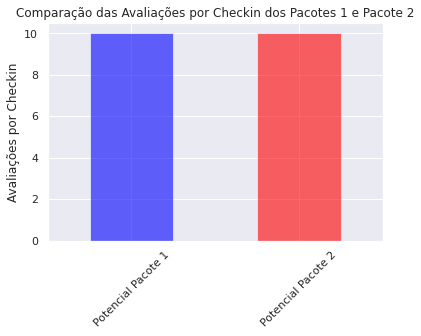

In [ ]:
ax = df_top_acomodacoes['avaliação_checkin'].plot.bar(color=['Blue', 'Red'], alpha=0.6)

ax.set_xticklabels(['Potencial Pacote 1', 'Potencial Pacote 2'])
plt.title('Comparação das Avaliações por Checkin dos Pacotes 1 e Pacote 2')
plt.ylabel('Avaliações por Checkin')
plt.xticks(rotation=45)
plt.show()

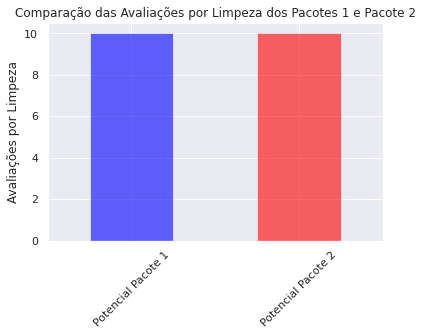

In [ ]:
ax = df_top_acomodacoes['avaliação_limpeza'].plot.bar(color=['Blue', 'Red'], alpha=0.6)

ax.set_xticklabels(['Potencial Pacote 1', 'Potencial Pacote 2'])
plt.title('Comparação das Avaliações por Limpeza dos Pacotes 1 e Pacote 2')
plt.ylabel('Avaliações por Limpeza')
plt.xticks(rotation=45)
plt.show()

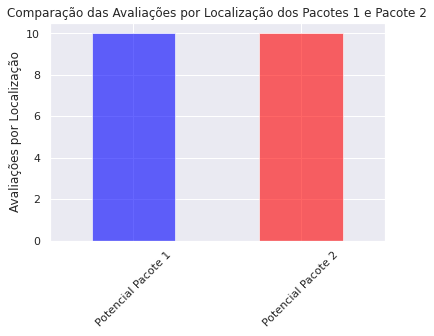

In [ ]:
ax = df_top_acomodacoes['avaliação_localização'].plot.bar(color=['Blue', 'Red'], alpha=0.6)

ax.set_xticklabels(['Potencial Pacote 1', 'Potencial Pacote 2'])
plt.title('Comparação das Avaliações por Localização dos Pacotes 1 e Pacote 2')
plt.ylabel('Avaliações por Localização')
plt.xticks(rotation=45)
plt.show()

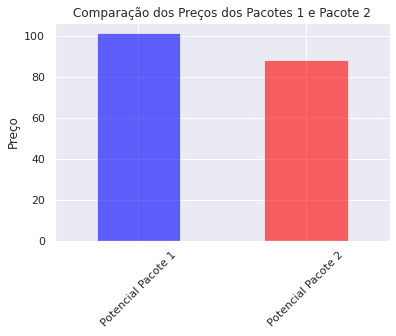

In [ ]:
ax = df_top_acomodacoes['preço'].plot.bar(color=['Blue', 'Red'], alpha=0.6)

ax.set_xticklabels(['Potencial Pacote 1', 'Potencial Pacote 2'])
plt.title('Comparação dos Preços dos Pacotes 1 e Pacote 2')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()

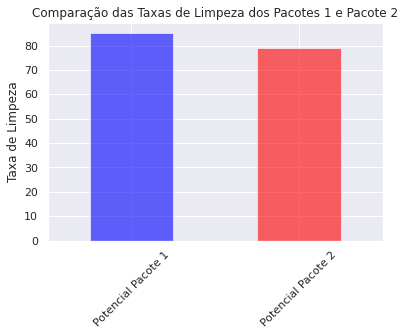

In [ ]:
ax = df_top_acomodacoes['taxa_de_limpeza'].plot.bar(color=['Blue', 'Red'], alpha=0.6)

ax.set_xticklabels(['Potencial Pacote 1', 'Potencial Pacote 2'])
plt.title('Comparação das Taxas de Limpeza dos Pacotes 1 e Pacote 2')
plt.ylabel('Taxa de Limpeza')
plt.xticks(rotation=45)
plt.show()

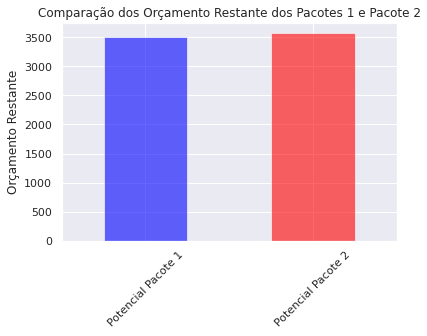

In [ ]:
ax = df_top_acomodacoes['orçamento_restante'].plot.bar(color=['Blue', 'Red'], alpha=0.6)

ax.set_xticklabels(['Potencial Pacote 1', 'Potencial Pacote 2'])
plt.title('Comparação dos Orçamento Restante dos Pacotes 1 e Pacote 2')
plt.ylabel('Orçamento Restante')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_caracteristicas = pd.DataFrame(
    {
        'caracteristica': ['avaliação_geral', 'avaliação_geral',
                           'avaliações_por_mês', 'avaliações_por_mês',
                           'avaliacao_comunicação_host', 'avaliacao_comunicação_host', 
                           'avaliação_checkin', 'avaliação_checkin', 
                           'avaliação_limpeza', 'avaliação_limpeza',
                           'avaliação_localização', 'avaliação_localização', 
                           'preço', 'preço', 
                           'taxa_de_limpeza', 'taxa_de_limpeza', 
                           ],
        'valor': [potencial_pacote_1['avaliação_geral'], potencial_pacote_2['avaliação_geral'],
                  potencial_pacote_1['avaliações_por_mês'], potencial_pacote_2['avaliações_por_mês'],
                  potencial_pacote_1['avaliacao_comunicação_host'], potencial_pacote_2['avaliacao_comunicação_host'],
                  potencial_pacote_1['avaliação_checkin'], potencial_pacote_2['avaliação_checkin'],
                  potencial_pacote_1['avaliação_limpeza'], potencial_pacote_2['avaliação_limpeza'],
                  potencial_pacote_1['avaliação_localização'], potencial_pacote_2['avaliação_localização'],
                  potencial_pacote_1['preço'], potencial_pacote_2['preço'],
                  potencial_pacote_1['taxa_de_limpeza'], potencial_pacote_2['taxa_de_limpeza'],
                      ],
        'tipo_pacote': ['pacote_1', 'pacote_2',
                        'pacote_1', 'pacote_2',
                        'pacote_1', 'pacote_2', 
                        'pacote_1', 'pacote_2',
                        'pacote_1', 'pacote_2',
                        'pacote_1', 'pacote_2',
                        'pacote_1', 'pacote_2',
                        'pacote_1', 'pacote_2',
                        ]
    }
)

df_caracteristicas.head()

,caracteristica,valor,tipo_pacote
0,avaliação_geral,96.00,pacote_1
1,avaliação_geral,99.00,pacote_2
2,avaliações_por_mês,1.70,pacote_1
3,avaliações_por_mês,2.04,pacote_2
4,avaliacao_comunicação_host,10.00,pacote_1


In [ ]:
pd.crosstab([df_caracteristicas['caracteristica'], df_caracteristicas['valor']], df_caracteristicas['tipo_pacote'],normalize='index')

tipo_pacote                        pacote_1  pacote_2
caracteristica             valor                     
avaliacao_comunicação_host 10.00        0.5       0.5
avaliação_checkin          10.00        0.5       0.5
avaliação_geral            96.00        1.0       0.0
                           99.00        0.0       1.0
avaliação_limpeza          10.00        0.5       0.5
avaliação_localização      10.00        0.5       0.5
avaliações_por_mês         1.70         1.0       0.0
                           2.04         0.0       1.0
preço                      88.00        0.0       1.0
                           101.00       1.0       0.0
taxa_de_limpeza            79.00        0.0       1.0
                           85.00        1.0       0.0

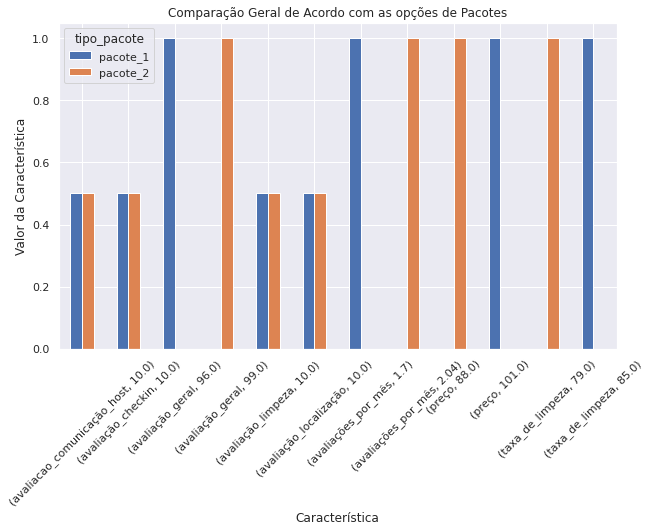

In [ ]:
pd.crosstab([df_caracteristicas['caracteristica'], df_caracteristicas['valor']], df_caracteristicas['tipo_pacote'],normalize='index').plot.bar(figsize=(10, 6))

plt.title('Comparação Geral de Acordo com as opções de Pacotes')
plt.xticks(rotation=45)
plt.xlabel('Característica')
plt.ylabel('Valor da Característica')
plt.show()

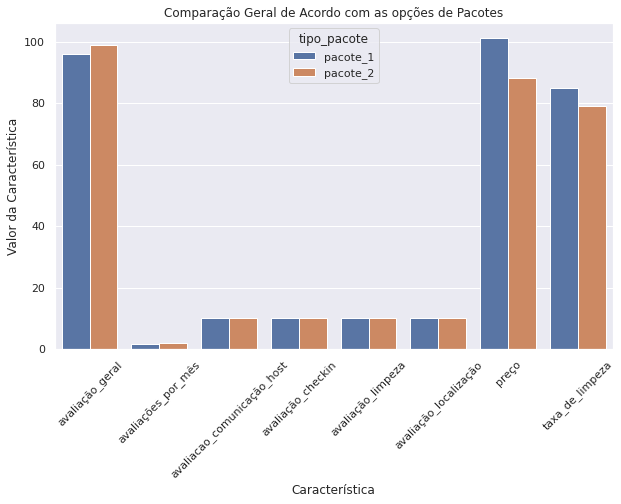

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x='caracteristica', y='valor', hue='tipo_pacote', data=df_caracteristicas)

plt.title('Comparação Geral de Acordo com as opções de Pacotes')
plt.xticks(rotation=45)
plt.xlabel('Característica')
plt.ylabel('Valor da Característica')
plt.show()

In [ ]:
print(f"O potencial pacote 1 oferece |{potencial_pacote_1['tipo_de_propriedade']}| como tipo de propriedade")
print(f"O potencial pacote 2 oferece |{potencial_pacote_2['tipo_de_propriedade']}| como tipo de propriedade")

O potencial pacote 1 oferece |Serviced apartment| como tipo de propriedade
O potencial pacote 2 oferece |Apartment| como tipo de propriedade


In [ ]:
print(f"O potencial pacote 1 oferece |{potencial_pacote_1['tipo_de_quarto']}| como tipo_de_quarto")
print(f"O potencial pacote 2 oferece |{potencial_pacote_2['tipo_de_quarto']}| como tipo_de_quarto")

O potencial pacote 1 oferece |Hotel room| como tipo_de_quarto
O potencial pacote 2 oferece |Private room| como tipo_de_quarto


In [ ]:
print(f"O potencial pacote 1 oferece |{potencial_pacote_1['bairro']}| como bairro")
print(f"O potencial pacote 2 oferece |{potencial_pacote_2['bairro']}| como bairro")

O potencial pacote 1 oferece |Copacabana| como bairro
O potencial pacote 2 oferece |Copacabana| como bairro


In [ ]:
print(f"O potencial pacote 1 oferece |{potencial_pacote_1['facilidades']}| como facilidades")
print(f"O potencial pacote 2 oferece |{potencial_pacote_2['facilidades']}| como facilidades")

O potencial pacote 1 oferece |{TV,"Cable TV",Internet,Wifi,"Air conditioning","Wheelchair accessible",Pool,Doorman,Gym,Elevator,"Buzzer/wireless intercom","Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_50","Self check-in","Building staff","Private entrance","Hot water"}| como facilidades
O potencial pacote 2 oferece |{TV,"Cable TV",Internet,Wifi,"Air conditioning","Wheelchair accessible",Pool,Kitchen,Doorman,"Pets live on this property",Cat(s),Elevator,"Buzzer/wireless intercom","Family/kid friendly",Washer,Essentials,Shampoo,"Lock on bedroom door","24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Window guards","Room-darkening shades","Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,"Dishes and silverware","Cooking basics",Oven,Stove,"Luggage dropoff allowe

In [ ]:
print(f"O potencial pacote 1 tem |{potencial_pacote_1['regras_da_casa']}| como regras_da_casa")
print(f"O potencial pacote 2 tem |{potencial_pacote_2['regras_da_casa']}| como regras_da_casa")

O potencial pacote 1 tem |4 Small rules :) 1) Please, don't make too much noise after the 10 pm.  2) Smoking is not allowed inside the room. 3) If happen any damage, please, let me know as soon as possible. 4) Except the AC, please, turn off all the eletronics and lights inside the room.| como regras_da_casa
O potencial pacote 2 tem |Regras da Casa / Reglas de La Casa / House Rules ----- 1) Desligar as luzes e o ar-condicionado ao sair.  2) Sair com a chave da sala. 3) Usar camisa no elevador. 4) Não manchar toalhas e lençóis com maquiagem, óleo e creme.  5) Não passar roupas na cama. 6) Limpar a areia antes de entrar no prédio. 7) Não fazer festas no apartamento. 8) Não são permitidos visitantes, sem prévia autorização. 9) Não fumar no apartamento.  10) Respeitar horário de silêncio de 22 h às 8 h. ----- 1) Apagar las luces y el aire acondicionado al salir. 2) Salir con la llave de la sala. 3) Usar camisa en el elevador. 4) No manchar toallas y sábanas con maquillaje, aceite y crema. 

In [ ]:
print(f"O potencial pacote 1 tem |{potencial_pacote_1['nome']}| como nome")
print(f"O potencial pacote 2 tem |{potencial_pacote_2['nome']}| como nome")

O potencial pacote 1 tem |Private Room in Copacabana  -> The Best Price! :)| como nome
O potencial pacote 2 tem |Casa de Família Quarto 4 pessoas Piscina Metrô| como nome


In [ ]:
print(f"O potencial pacote 1 oferece |{potencial_pacote_1['pessoas_inclusas_no_preço']}| como pessoas_inclusas_no_preço")
print(f"O potencial pacote 2 oferece |{potencial_pacote_2['pessoas_inclusas_no_preço']}| como pessoas_inclusas_no_preço")

O potencial pacote 1 oferece |2| como pessoas_inclusas_no_preço
O potencial pacote 2 oferece |3| como pessoas_inclusas_no_preço


In [ ]:
print(f"O potencial pacote 1 oferece |{potencial_pacote_1['noites_mínimas']}| como noites_mínimas")
print(f"O potencial pacote 2 oferece |{potencial_pacote_2['noites_mínimas']}| como noites_mínimas")

O potencial pacote 1 oferece |3| como noites_mínimas
O potencial pacote 2 oferece |2| como noites_mínimas


In [ ]:
print(f"O potencial pacote 1 oferece |{potencial_pacote_1['noites_máximas']}| como noites_máximas")
print(f"O potencial pacote 2 oferece |{potencial_pacote_2['noites_máximas']}| como noites_máximas")

O potencial pacote 1 oferece |60| como noites_máximas
O potencial pacote 2 oferece |32| como noites_máximas


In [ ]:
from datetime import datetime

In [ ]:
# Data final
data_hoje = datetime.strptime(datetime.today().strftime('%Y-%m-%d'), '%Y-%m-%d')

# Data inicial
pac1_inicio_host = datetime.strptime(potencial_pacote_1.loc['inicio_host'], '%Y-%m-%d')
pac2_inicio_host = datetime.strptime(potencial_pacote_2.loc['inicio_host'], '%Y-%m-%d')

# Realizamos o calculo da quantidade de dias
quantidade_dias_pac1 = abs((pac1_inicio_host - data_hoje).days)
quantidade_dias_pac2 = abs((pac2_inicio_host - data_hoje).days)
print(f"O potencial pacote 1 está há |{quantidade_dias_pac1}| dias anunciando na plataforma")
print(f"O potencial pacote 2 está há |{quantidade_dias_pac2}| dias anunciando na plataforma")

O potencial pacote 1 está há |2914| dias anunciando na plataforma
O potencial pacote 2 está há |2129| dias anunciando na plataforma


A partir das características do **potencial pacote 2**, achamos ser a melhor **acomodação** para compôr o **pacote**. <br><br>
Pois o **pacote 2** no geral possui o **preço** e **taxa de limpeza** **menor**, possui **maior avaliação geral** dos usuário, é um espaço mais **privado** (private room). Além de ter todas as **demais características** filtradas anteriormente, como **preço acessível, proximidade aos pontos turísticos, tipo de quarto/propriedade, possui cama de casal, possui piscina na acomodação**, etc. <br><br>
**Ideal** para o **perfil do casal** que quer comemorar seu aniversário de casamento.

In [ ]:
# Day Spa Good Living no Copacabana Palace
preco_km = 3

preco_transporte_spa = (1.1 * preco_km) * 2
preco_entrada_spa = 1500 #para casal
total_spa = preco_entrada_spa + preco_transporte_spa

print(f'Valor no transporte para o Day Spa Good Living no Copacabana Palace (ida e volta): \tR${preco_transporte_spa:.2f}')
print(f'Valor no entrada para o Day Spa Good Living no Copacabana Palace: \t\t\tR${preco_entrada_spa:.2f}')
print('-'*120)
print(f'Valor total para o Day Spa Good Living no Copacabana Palace: \t\t\t\tR${total_spa:.2f}')

Valor no transporte para o Day Spa Good Living no Copacabana Palace (ida e volta): 	R$6.60
Valor no entrada para o Day Spa Good Living no Copacabana Palace: 			R$1500.00
------------------------------------------------------------------------------------------------------------------------
Valor total para o Day Spa Good Living no Copacabana Palace: 				R$1506.60


Um dia no spa para relaxar e curtir.

In [ ]:
# Restaurante Ristorante Hotel Cipriani
preco_transporte_cipriani = (1.6 * preco_km) * 2
preco_entrada_cipriani = 420 + (90 * 2) #R$420 para menu degustação e R$90 para cada pessoa no jantar
total_cipriani = preco_transporte_cipriani + preco_entrada_cipriani

print(f'Valor no transporte para o Ristorante Hotel Cipriani (ida e volta): \tR${preco_transporte_cipriani:.2f}')
print(f'Valor no entrada para o Ristorante Hotel Cipriani: \t\t\tR${preco_entrada_cipriani:.2f}')
print('-'*80)
print(f'Valor total para o Ristorante Hotel Cipriani: \t\t\t\tR${total_cipriani:.2f}')

Valor no transporte para o Ristorante Hotel Cipriani (ida e volta): 	R$9.60
Valor no entrada para o Ristorante Hotel Cipriani: 			R$600.00
--------------------------------------------------------------------------------
Valor total para o Ristorante Hotel Cipriani: 				R$609.60


Um jantar romântico no mesmo lugar do spa (Copacabana Palace) em um dos melhores restaurantes da região.

In [ ]:
# Restaurante Passeio Ilha da Gigóia
preco_transporte_gigoia = (16 * preco_km) * 2
preco_entrada_gigoia = (20*2) # R$20 para cada pessoa
total_gigoia = preco_transporte_gigoia + preco_entrada_gigoia

print(f'Valor no transporte para o Passeio Ilha da Gigóia (ida e volta): \tR${preco_transporte_gigoia:.2f}')
print(f'Valor no entrada para o Passeio Ilha da Gigóia: \t\t\tR${preco_entrada_gigoia:.2f}')
print('-'*80)
print(f'Valor total para o Passeio Ilha da Gigóia: \t\t\t\tR${total_gigoia:.2f}')

Valor no transporte para o Passeio Ilha da Gigóia (ida e volta): 	R$96.00
Valor no entrada para o Passeio Ilha da Gigóia: 			R$40.00
--------------------------------------------------------------------------------
Valor total para o Passeio Ilha da Gigóia: 				R$136.00


Um passeio relaxante para curtir a natureza e a paisagem da Ilha da Gigóia

In [ ]:
# Restaurante Praia Copacabana
preco_transporte_praia = (0.6 * preco_km) * 2
preco_entrada_praia = 50 #Entrada para praia pública, mas pode alugar guarda-sol (R$50)
total_praia = preco_transporte_praia + preco_entrada_praia

print(f'Valor no transporte para o Praia Copacabana (ida e volta): \tR${preco_transporte_praia:.2f}')
print(f'Valor no entrada para o Praia Copacabana: \t\t\tR${preco_entrada_praia:.2f}')
print('-'*80)
print(f'Valor total para o Praia Copacabana: \t\t\t\tR${total_praia:.2f}')

Valor no transporte para o Praia Copacabana (ida e volta): 	R$3.60
Valor no entrada para o Praia Copacabana: 			R$50.00
--------------------------------------------------------------------------------
Valor total para o Praia Copacabana: 				R$53.60


Momentos para curtir e aproveitar na praia de Copacabana, próximo à acomodação.

In [ ]:
orcamento_restante_pontos_turisticos = potencial_pacote_2.loc['orçamento_restante'] - total_spa

print(f"Orçamento máximo é de: \t\t\t\t\t\tR${orcamento_max:.2f}")
print('-'*80)
print(f"Preço do aluguel é de: \t\t\t\t\t\tR${potencial_pacote_2.loc['preço']:.2f}")
print(f"Preço da taxa de limpeza é de: \t\t\t\t\tR${potencial_pacote_2.loc['taxa_de_limpeza']:.2f}")
print('-'*80)
print(f"Preço total da acomodação é de: \t\t\t\tR${potencial_pacote_2.loc['acomodação_e_taxas']:.2f}")
print('-'*80)
print(f"Orçamento restante sem pontos turísticos é de: \t\t\tR${potencial_pacote_2.loc['orçamento_restante']:.2f}")
print(f'Valor total Day Spa Good Living no Copacabana Palace é de: \tR${total_spa:.2f}')
print('-'*80)
print(f'Orçamento restante para pontos turísticos é de: \t\tR${orcamento_restante_pontos_turisticos:.2f}')
print('-'*80)
print(f'Valor total Ristorante Hotel Cipriani é de: \t\t\tR${total_cipriani:.2f}')
print(f'Valor total Passeio Ilha da Gigóia é de: \t\t\tR${total_gigoia:.2f}')
print(f'Valor total Passeio Praia Copacabana é de: \t\t\tR${total_praia:.2f}')
print('-'*80)
print(f'Valor total dos Outros Pontos Turísticos Selecionados é de: \tR${total_cipriani + total_gigoia + total_praia:.2f}')
print('-'*80)
print(f"Preço Total da Viagem: \t\t\t\t\t\tR${potencial_pacote_2.loc['acomodação_e_taxas']+total_spa+total_cipriani+total_gigoia+total_praia:.2f}")
print(f'Orçamento restante: \t\t\t\t\t\tR${orcamento_restante_pontos_turisticos - (total_cipriani + total_gigoia + total_praia):.2f}')

Orçamento máximo é de: 						R$4000.00
--------------------------------------------------------------------------------
Preço do aluguel é de: 						R$88.00
Preço da taxa de limpeza é de: 					R$79.00
--------------------------------------------------------------------------------
Preço total da acomodação é de: 				R$431.00
--------------------------------------------------------------------------------
Orçamento restante sem pontos turísticos é de: 			R$3569.00
Valor total Day Spa Good Living no Copacabana Palace é de: 	R$1506.60
--------------------------------------------------------------------------------
Orçamento restante para pontos turísticos é de: 		R$2062.40
--------------------------------------------------------------------------------
Valor total Ristorante Hotel Cipriani é de: 			R$609.60
Valor total Passeio Ilha da Gigóia é de: 			R$136.00
Valor total Passeio Praia Copacabana é de: 			R$53.60
-----------------------------------------------------------------------------

In [ ]:
potencial_pacote_2

id                                                                         11003107
link_da_acomodacão                            https://www.airbnb.com/rooms/11003107
nome                                 Casa de Família Quarto 4 pessoas Piscina Metrô
resumo                            * Apartamento compartilhado com Márcia e Fábio...
o_espaço                          * Já recebemos muitos grupos no Rio, com ótima...
descrição                         * Apartamento compartilhado com Márcia e Fábio...
visao_geral_bairro                * Copacabana está na Zona Sul do Rio, um dos b...
observações                       Regras da Casa  ----- 1) Desligar as luzes e o...
transito                          * Recepção aberta durante 24 horas * Acesso fa...
acesso                            * Bar Bunda de Fora. Boa comida a kilo ao lado...
interacao                         * Não hesite em nos contatar para mais informa...
regras_da_casa                    Regras da Casa / Reglas de La Casa / House

In [ ]:
preco_acesso_pts = preco_entrada_praia + preco_entrada_cipriani + preco_entrada_spa + preco_entrada_gigoia
print(f'Preço total acesso aos pontos turísticos é de: R${preco_acesso_pts:.2f}')

Preço total acesso aos pontos turísticos é de: R$2190.00


In [ ]:
preco_deslocamentos = preco_transporte_praia + preco_transporte_cipriani + preco_transporte_spa + preco_transporte_gigoia
print(f'Preço total de deslocamentos é de: R${preco_deslocamentos:.2f}')

Preço total de deslocamentos é de: R$115.80


In [ ]:
print(f'Preço total pontos turísticos é de: R${preco_deslocamentos + preco_acesso_pts:.2f}')

Preço total pontos turísticos é de: R$2305.80


Abaixo, encontra-se o **mapa** com a marcação aproximada da **acomodação** (bairro) e dos **pontos turísticos** que serão **visitados** durante sua estadia do casal.

In [ ]:
import folium
from pprint import pprint

# Criação do mapa
map = folium.Map(location=[-22.969427216331148, -43.18668462160828], tiles='cartodbpositron', zoom_start=20)

# Coordenadas dos lugares
coord_acomodacao = [-22.969427216331148, -43.18668462160828]  #Coordernada do bairro Copacabana
coord_spa = [-22.967310871644518, -43.17929349895604]
coord_cipriani = [-22.967260593293776, -43.179182098956026] 
coord_gigoia = [-23.002896034730586, -43.30962012937289]
coord_praia = [-22.97386788495703, -43.18533651762055]

# Tooltip
tooltip_acomodacao = "Clique para ver o lugar"

# Markers
folium.Marker(coord_acomodacao, popup="<i>Acomodação Fica nesta Região!</i>", tooltip=tooltip_acomodacao,icon=folium.Icon(color="blue", icon="hotel", prefix='fa')).add_to(map)
folium.Marker(coord_spa, popup="<i>Day Good Living no Copacabana Palace</i>", tooltip=tooltip_acomodacao,icon=folium.Icon(color="purple", icon="diamond", prefix='fa')).add_to(map)
folium.Marker(coord_cipriani, popup="<i>Ristorante Hotel Cipriani</i>", tooltip=tooltip_acomodacao,icon=folium.Icon(color="purple", icon="glass", prefix='fa')).add_to(map)
folium.Marker(coord_gigoia, popup="<i>Ilha da Gigóia</i>", tooltip=tooltip_acomodacao,icon=folium.Icon(color="green", icon="camera", prefix='fa')).add_to(map)
folium.Marker(coord_praia, popup="<i>Praia Copacabana</i>", tooltip=tooltip_acomodacao, icon=folium.Icon(color="yellow", icon="anchor", prefix='fa')).add_to(map)

map

# Conteúdo do Pacote

* **Perfil 1**: Um casal de aproximadamente 55 anos.
* **Acomodação:** ID **11003107**;<br>
  **+ Descrição:**
  * **Nome:** Casa de Família Quarto 4 pessoas Piscina Metrô; 
  * **Avaliação Geral:** 99; 
  * **Regras gerais da Casa:**
    1. Desligar as luzes e o ar-condicionado ao sair. 
    2. Sair com a chave da sala. 
    3. Usar camisa no elevador. 
    4. Não manchar toalhas e lençóis com maquiagem, óleo e creme.  
    5. Não passar roupas na cama. 
    6. Limpar a areia antes de entrar no prédio. 
    7. Não fazer festas no apartamento. 
    8. Não são permitidos visitantes, sem prévia autorização. 
    9. Não fumar no apartamento.  
    10. Respeitar horário de silêncio de 22 h às 8 h.
  * **Facilidades:**
    * TV,
    * Internet,
    * Wifi,
    * Air conditioning,
    * **Pool**,
    * Kitchen,
    * Elevator,
    * Washer,
    * Shampoo,
    * etc.
  * **Bairro:** Copacabana
  * **Proximidade dos Pontos Turísticos:**
    * Day Good Living no Copacabana Palace
    * Ristorante Hotel Cipriani
    * Praia Copacabana
  * **Nome do host:** Márcia
  * **Superhost:** Sim
  * **Tempo em que está anunciando na plataforma:** 1938 dias (até 23/05/2021).
* **Pontos turísticos:** Passeio no **Day Good Living no Copacabana Palace**; Jantar no **Ristorante Hotel Cipriani**; Passeio na **Ilha da Gigóia**; Passeio na **Praia Copacabana**.
* **Custo total:** **R\$2736,80** -> Acomodação **R\$431,00** + Acesso aos pontos turísticos **R\$2190,00** + Deslocamentos **R\$115,80**.